In [2]:
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import Button, Dropdown, HBox
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import requests
from bs4 import BeautifulSoup
import seaborn as sns
import os
import glob
import scipy.stats

import urllib.request

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.action_chains import ActionChains

import functools
from shutil import copyfile
import time

from IPython.display import HTML, display
import tabulate
import random
from scipy.stats import pearsonr

****************Please look at each discription above each main code********************

In [3]:
# This to start with Journals or Country
def first(URL):
    page = requests.get(URL)

    soup = BeautifulSoup(page.content, 'html.parser')
    results = soup.find_all(id='rankingcontrols')

    link_name=[]
    for item in results:
        div_class=item.find(class_='dropdown-options dropdown-element')
        for div in div_class:
            for v in div:
                for i in v:
                    if '\n'!=i:
                        link_name.append(i)
                    #print(i)
    links=[]    
    for item in div_class:
        hlink=item.find('a')
        idx=str(hlink).find('href')
        idx2=str(hlink).find('>',idx)
        link=str(hlink)[idx+6:idx2-1]
        #print(hlink)
        #print('***********************************************************')
        #print(link)
        if 'php' in link:
            links.append(link)
    return links,link_name
#first('https://www.scimagojr.com/journalrank.php')

In [4]:
#This to return all links and links name to specific page
def Area(url):
    URL2 =url
    page2 = requests.get(URL2)
    soup2 = BeautifulSoup(page2.content, 'html.parser')
    results2 = soup2.find_all(id='rankingparameters')
    link_name2=[]
    links2=[] 
    for item in results2:
        c=item.find_all('a')
        for i in c:
            link_name2.append(i.text)
            links2.append(i['href'])
    return link_name2,links2
#Area('https://www.scimagojr.com/journalrank.php')
#links,link_name=first('https://www.scimagojr.com/journalrank.php')

In [5]:
#This allow user to list and rank journals or country
#option='2'
#url=''
def show(links,link_name):
    #year_list=[]
    try:
        url=''
        def clicked(arg):
            button.disabled=True
            def clicked2(arg):
                button2.disabled=True
                def clicked3(arg):
                    button3.disabled=True
                    def clicked4(arg,url_=''):
                        def clicked6(arg,url_=''):
                            url=url_+'&'+'year='+str(choices6.value)+'&'+'order=it&ord='+choices5.value
                            if '?' in url:
                                print('')
                            else:
                                url=url.replace('php','php?')
                            try:
                                
                                driver=webdriver.Firefox()
                                driver.get(url)
                                driver.find_element_by_link_text('Download data').click()
                                #year_list.appendd(str(choices6.value))
                            except:
                                print(' Sorry, your Ranking Parameters did not match any journal. Please, try different values.')       
                            print(url)
                            #year_list.append(str(choices6.value))
                            #return str(choices6.value)
                        #button4.disabled=True
                        d=dict({'All type':'all','Journals':'j','Book Series':'k','Conferences and Proceedings':'p','Trade Journals':'d'})
                        if option=='2':
                            url_=url_+'&'+'type='+d[choices4.value]
                            print(url_)
                        url=url_
                        choices5 = Dropdown(options=['asc','desc'], description='Choice')
                        #button5 = Button(description="Select")
                        choices6 = Dropdown(options=range(2019,1998,-1), description='Choice')
                        button6 = Button(description="Download")
                        #button7 = Button(description="Stop")
                        panel5 = HBox([choices5,choices6, button6])

                        button6.on_click(functools.partial(clicked6, url_=url))#,remove=True)
                        #year_list.append(year)
                        #print(url_list)
                        display(panel5)


                    idx3=country_name.index(choices3.value)
                    url='https://www.scimagojr.com/'+new_list2[idx3]
                    print(url)
                    Name_links3,Links3=Area(url)

                    if option=='2':
                        print('Select the Type :')
                        typ=['All type','Journals','Book Series','Conferences and Proceedings','Trade Journals']
                        choices4 = Dropdown(options=typ, description='Choice')
                        button4 = Button(description="Select")
                        panel4 = HBox([choices4, button4])

                        button4.on_click(functools.partial(clicked4, url_=url))#,remove=True)
                        display(panel4)
                    else:
                        button7 = Button(description="Continue")
                        panel7 = HBox([button7])

                        button7.on_click(functools.partial(clicked4, url_=url))#,remove=True)
                        display(panel7)
                    #return year_list    


                idx2=categ_names.index(choices2.value)
                url='https://www.scimagojr.com/'+new_list[idx2]
                print(url)
                Name_links2,Links2=Area(url)
                #print(new_list)


                print('Select the Country :....')
                new_list2=[]
                c=0
                x=0
                country_name=[]
                for i in Name_links2:
                    if 'All regions' in i:
                        c=1
                    if 'All types' in i or '1996-2019' in i:
                        c=0
                    if c>=1:
                        #print(i,c)
                        country_name.append(i)
                        new_list2.append(Links2[x])
                        c+=1
                    x+=1
                choices3 = Dropdown(options=country_name, description='Choice')
                button3 = Button(description="Select")
                panel3 = HBox([choices3, button3])

                button3.on_click(clicked3)#,remove=True)
                display(panel3)
                #return year_list

            #print("button has been clicked!")
            idx=link_name.index(choices.value)
            url='https://www.scimagojr.com/'+links[int(idx)]
            print(url,idx)
            Name_links1,Links1=Area(url)
            print('Select categories:...........')
            c=0
            x=0
            new_list=[]
            categ_names=[]
            for i in Name_links1:
                if 'All subject categories' in i:
                    c=1
                if 'All regions' in i:
                    c=0
                if c>=1:
                    #print(i,c)
                    categ_names.append(i)
                    new_list.append(Links1[x])
                    c+=1
                x+=1
            choices2 = Dropdown(options=categ_names, description='Choice')
            button2 = Button(description="Select")
            panel2 = HBox([choices2, button2])

            button2.on_click(clicked2)#,remove=True)
            display(panel2)
            #return year_list

        n=1
        print('Select your subjrct area:........')
        choices = Dropdown(options=link_name, description='Choice')
        button = Button(description="Select")
        panel = HBox([choices, button])

        button.on_click(clicked)#,remove=True)
        display(panel)
        #return year_list
    except:
        print(' Sorry, your Ranking Parameters did not match any journal. Please, try different values.')        
   
    return year_list    
#show(links,link_name)

(Q1)***************************This To load data from scimago site********************************
if you want to start from beagning... RUN this code but the data is loaded as csv files so please convert it to xlsx after loading and 
continue runing the comming codes......... 

In [6]:
#This to read files from scimago sites ************This the Start code************
df_list=[]
df_name=[]
option=" "

url_list=[]


all_data=[]
try:
    option=input('Enter 1 for country or 2 for journals')
    if option=='1':
        URL = 'https://www.scimagojr.com/countryrank.php'
    else:
        URL = 'https://www.scimagojr.com/journalrank.php'
    links,link_name=first(URL)
    show(links,link_name)
except:
    print(' Sorry, your Ranking Parameters did not match any journal. Please, try different values.')

Enter 1 for country or 2 for journals1
Select your subjrct area:........


 Sorry, your Ranking Parameters did not match any journal. Please, try different values.
https://www.scimagojr.com/countryrank.php?area=1600 6
Select categories:...........


https://www.scimagojr.com/countryrank.php?area=1600&category=1601
Select the Country :....


https://www.scimagojr.com/countryrank.php?category=1601&area=1600®ion=EU-28



https://www.scimagojr.com/countryrank.php?category=1601&area=1600®ion=EU-28&year=2004&order=it&ord=desc

https://www.scimagojr.com/countryrank.php?category=1601&area=1600®ion=EU-28&year=2004&order=it&ord=desc

https://www.scimagojr.com/countryrank.php?category=1601&area=1600®ion=EU-28&year=2004&order=it&ord=desc


In [7]:
# To Move All Downloded files to local Dirctory.....But pleas convert all csv files to xlsx befor run this code 
year_listJ=['1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019']
year_listC=[]
def move_files_to_D():
    try:
        if option=='1':
            os.mkdir("Countries")
        else:
            os.mkdir("Journals")
        year_listJ=[]
    except:
        print('The folder already exist.....')
    for filename in os.listdir("C:\\Users\\user\\Downloads"):
        if 'scimago' in filename:
            print(filename)
            if option=='1':
                year_listC.append(filename[filename.find('.')-4:filename.find('.')].strip())
                copyfile("C:\\Users\\user\\Downloads"+"\\"+filename, "Countries" + "\\" + filename)
                os.remove("C:\\Users\\user\\Downloads"+"\\"+filename)
            else:
                year_listJ.append(filename[filename.find('.')-4:filename.find('.')].strip())
                copyfile("C:\\Users\\user\\Downloads"+"\\"+filename, "Journals" + "\\" + filename)
                os.remove("C:\\Users\\user\\Downloads"+"\\"+filename)
move_files_to_D()

scimagojr country rank 2004.xlsx


In [8]:
#This to load all countries files to DataFrame
all_data_country=[]
def save_country_Dataframe():
    for filename in os.listdir("D:\\Countries"):
        df=pd.read_excel("D:\\Countries\\"+filename)
        all_data_country.append(df)
save_country_Dataframe()

In [9]:
#This to load all journals files to DataFrame
all_data_journals=[]
def save_Journals_Dataframe():
    for filename in os.listdir("D:\\Journals"):
        df=pd.read_excel("D:\\Journals\\"+filename)
        all_data_journals.append(df)
save_Journals_Dataframe()

In [10]:
all_data_country[0].head()

,Rank,Country,Region,Documents,Citable documents,Citations,Self-citations,Citations per document,H index
0,214,South Georgia and the South Sandwich Islands,Latin America,1,1,38,0,38.0,4
1,213,Saint Vincent and the Grenadines,Latin America,1,1,9,0,9.0,21
2,212,San Marino,Western Europe,1,1,125,0,125.0,36
3,211,Saint Lucia,Latin America,1,1,21,1,21.0,28
4,210,Christmas Island,Pacific Region,1,1,4,0,4.0,4


In [14]:
all_data_journals[20].head()

,Rank,Sourceid,Title,Type,Issn,SJR,SJR Best Quartile,H index,Total Docs. (2019),Total Docs. (3years),Total Refs.,Total Cites (3years),Citable Docs. (3years),Cites / Doc. (2years),Ref. / Doc.,Country,Region,Publisher,Coverage,Categories
0,1,28773,CA - A Cancer Journal for Clinicians,journal,"15424863, 00079235",88192,Q1,156,36,129,2924,22644,89,"255,73","81,22",United States,Northern America,Wiley-Blackwell,1950-2020,Hematology (Q1); Oncology (Q1)
1,2,19434,MMWR. Recommendations and reports : Morbidity ...,journal,"10575987, 15458601",41022,Q1,138,4,11,144,898,11,"52,00","36,00",United States,Northern America,Centers for Disease Control and Prevention (CDC),1990-2020,Epidemiology (Q1); Health Information Manageme...
2,3,21100812243,Nature Reviews Materials,journal,20588437,36691,Q1,80,85,288,8534,12569,151,"68,34","100,40",United Kingdom,Western Europe,Nature Publishing Group,2016-2020,"Biomaterials (Q1); Electronic, Optical and Mag..."
3,4,29431,Quarterly Journal of Economics,journal,"00335533, 15314650",36220,Q1,246,30,123,1909,2020,119,"12,65","63,63",United Kingdom,Western Europe,Oxford University Press,1886-2020,Economics and Econometrics (Q1)
4,5,20315,Nature Reviews Molecular Cell Biology,journal,"14710072, 14710080",29997,Q1,411,115,382,9251,8074,182,"47,70","80,44",United Kingdom,Western Europe,Nature Publishing Group,2000-2020,Cell Biology (Q1); Molecular Biology (Q1)


In [11]:
len(all_data_journals)

21

(Q3)********This to fetch information about ANY journals the main code for this Q is (fetch_journal()) function******

In [16]:
def description(url):
    descrip=[]
    page = requests.get(url)
    soup = BeautifulSoup(page.content, 'html.parser')
    #content=soup.find(class_='dashboard')
    cell1=soup.find(class_='journaldescription colblock')
    table=cell1.find('table')
    Tr=table.find_all('tr')
    for tr in Tr:
        Td=tr.find_all('td')
        for td in Td:
            #print(td.text)
            val=td.text.strip().replace('\n','')
            val=val.replace('\t','')
            val=val.replace('\xa0-','')
            descrip.append(val.strip())
    descrip=descrip[:-4]
    j=0
    col=[]
    cont=[]
    for i in range(int(np.round(len(descrip)/2))):
        if 'Index' not in descrip[j]:
            col.append(descrip[j])
            cont.append(descrip[j+1])
            j=j+2
        else:
            j=j+1
    descrip=[col,cont]
    display(HTML(tabulate.tabulate(descrip, tablefmt='html')))
    #print(descrip)
#description('https://www.scimagojr.com/journalsearch.php?q=19482&tip=sid&clean=0')

In [18]:
def fetch_information(url):
    df_list=[]
    df_name=[]
    description(url)
    page = requests.get(url)
    soup = BeautifulSoup(page.content, 'html.parser')
    content=soup.find(class_='dashboard')
    
    cell1=content.find(class_='cell2x1 dynamiccell')
    cell1_title=cell1.find(class_='celltitle')
    #print(cell1_title.text)
    df_name.append(cell1_title.text)
    cell1_content=cell1.find(class_="cellcontent")
    #print(cell1_content.find('p').text)
    #print(cell1_content)
    cell1_taple=cell1_content.find('table')
    taple_header=cell1_taple.find('thead')
    #print(cell1_taple)
    header_cell1=[]
    for tr in taple_header:
        row=[i.text for i in tr]
        header_cell1.append(row)
        #print(row)
        
    taple_content=cell1_taple.find('tbody')
    taple_content=taple_content.find_all('tr')
    #print(cell1_taple)
    content_cell1=[]
    for td in taple_content:
        row=[i.text for i in td]
        content_cell1.append(row)
        #print(td.text)
    #print(content_cell1)
    df=pd.DataFrame(content_cell1,columns=header_cell1)
    df_list.append(df)
    
    
    cell1=content.find(class_='cell1x2 dynamiccell')
    cell1_title=cell1.find(class_='celltitle')
    #print(cell1_title.text)
    df_name.append(cell1_title.text)
    cell1_content=cell1.find(class_="cellcontent")
    #print(cell1_content.find('p').text)
    #print(cell1_content)
    cell1_taple=cell1_content.find('table')
    taple_header=cell1_taple.find('thead')
    #print(cell1_taple)
    header_cell1=[]
    for tr in taple_header:
        row=[i.text for i in tr]
        header_cell1.append(row)
        #print(row)
        
    taple_content=cell1_taple.find('tbody')
    taple_content=taple_content.find_all('tr')
    #print(cell1_taple)
    content_cell1=[]
    for td in taple_content:
        row=[i.text for i in td]
        content_cell1.append(row)
        #print(td.text)
    #print(content_cell1)
    df=pd.DataFrame(content_cell1,columns=header_cell1)
    df_list.append(df)
    
    
    
    #for cell in content:
    cells=content.find_all(class_='cell1x1 dynamiccell')
   # print(cells)
  
    for cell in cells:
        cell1_title=cell.find(class_='celltitle')
        #print(cell1_title.text)
        df_name.append(cell1_title.text)
        cell1_content=cell.find(class_="cellcontent")
        cell1_taple=cell1_content.find('table')
        taple_header=cell1_taple.find('thead')
        header_cell1=[]
        for tr in taple_header:
            row=[i.text for i in tr]
            header_cell1.append(row)
            #print(row)
        taple_content=cell1_taple.find('tbody')
        taple_content=taple_content.find_all('tr')
        #print(cell1_taple)
        content_cell1=[]
        for td in taple_content:
            row=[i.text for i in td]
            content_cell1.append(row)
        df=pd.DataFrame(content_cell1,columns=header_cell1)
        df_list.append(df)
        
    
    print('************The scimago IMPACT FACTOR***********')
    print(df_list[1][-1:].iloc[0,2])
    print('************The scimago IMPACT FACTOR***********')
    i=0
    for df in df_list:
        print(df_name[i])
        display(HTML(tabulate.tabulate(df.head(), tablefmt='html')))
        i+=1
    return df_list,df_name
#df_list,df_name=fetch_information('https://www.scimagojr.com/journalsearch.php?q=16801&tip=sid&clean=0')

In [19]:
jornal_info_list=[]
jornal_info_name=[]
def search_journal(choice):
    webpage = r"https://www.scimagojr.com/journalsearch.php" # edit me
    searchterm = choice # edit me

    driver = webdriver.Firefox()
    driver.get(webpage)

    sbox = driver.find_element_by_id("searchinput")
    sbox.send_keys(searchterm)

    submit = driver.find_element_by_id("searchbutton")
    submit.click()
    
    time.sleep(5)
    click_jornal=driver.find_element_by_class_name('jrnlname')
    click_jornal.click()
    print(driver.current_url)
    jornal_info_list,jornal_info_name=fetch_information(driver.current_url)
    #print(jornal_info_list[0])

In [20]:
def fetch_journal():
    def clicked(arg):
        val=choices.value
        print(val)
        search_journal(val)
        
    all_jornals=all_data_journals[0]['Title']
    for df in all_data_journals:
        all_jornals=np.logical_or(all_jornals,df['Title'])
    #print(all_jornals.dropna())
    print('Select your Journal to fetch information about it .....')
    choices = Dropdown(options=all_jornals.dropna().values[0:50], description='Choice')
    button = Button(description="Select")
    panel = HBox([choices, button])
    display(panel)
    #time.sleep(5)
    #val=choices.value
    #print(val)
    button.on_click(clicked)#,remove=True)
    #display(panel)
    
fetch_journal()

Select your Journal to fetch information about it .....


Annual Review of Pharmacology and Toxicology
https://www.scimagojr.com/journalsearch.php?q=19479&tip=sid&clean=0


Country,Subject Area and Category,Publisher,Publication type,ISSN,Coverage,Scope
United States,"Pharmacology, Toxicology and PharmaceuticsPharmacologyToxicology",Annual Reviews Inc.,Journals,"15454304, 03621642","1965-1973, 1975-2020","The Annual Review of Pharmacology and Toxicology, in publication since 1961, covers the significant developments in the fields of pharmacology and toxicology, including receptors, transporters, enzymes, and chemical agents; drug development science; systems such as the immune system, central and autonomic nervous systems, gastrointestinal system, cardiovascular system, endocrine system, and pulmonary system; and special topics."


************The scimago IMPACT FACTOR***********
11.475
************The scimago IMPACT FACTOR***********

        Quartiles
        


0,Pharmacology,1999,Q1
1,Pharmacology,2000,Q1
2,Pharmacology,2001,Q1
3,Pharmacology,2002,Q1
4,Pharmacology,2003,Q1



        Citations per document
      


0,Cites / Doc. (4 years),1999,20.833
1,Cites / Doc. (4 years),2000,22.131
2,Cites / Doc. (4 years),2001,24.655
3,Cites / Doc. (4 years),2002,23.258
4,Cites / Doc. (4 years),2003,24.38



SJR
      


0,1999,11.602
1,2000,11.736
2,2001,10.621
3,2002,10.266
4,2003,11.847



Total Cites Self-Cites
      


0,Self Cites,1999,1
1,Self Cites,2000,3
2,Self Cites,2001,11
3,Self Cites,2002,7
4,Self Cites,2003,5



External Cites per Doc Cites per Doc
      


0,External Cites per document,1999,20.818
1,External Cites per document,2000,23.845
2,External Cites per document,2001,22.141
3,External Cites per document,2002,23.39
4,External Cites per document,2003,22.598



% International Collaboration
      


0,1999,0
1,2000,11.11
2,2001,0
3,2002,0
4,2003,8



Citable documents Non-citable documents
      


0,Non-citable documents,1999,0
1,Non-citable documents,2000,0
2,Non-citable documents,2001,1
3,Non-citable documents,2002,1
4,Non-citable documents,2003,2



Cited documents Uncited documents
      


0,Uncited documents,1999,1
1,Uncited documents,2000,0
2,Uncited documents,2001,3
3,Uncited documents,2002,2
4,Uncited documents,2003,3


*************This very important steps to normalize the data Countries an journals********************8

In [21]:
def normalize_Alldata_country():
    for df in all_data_country:
        df['Rank']=df['Rank'].dropna().values.astype(float)
        df['Documents']=df['Documents'].dropna().values.astype(float)
        df['Citable documents']=df['Citable documents'].dropna().values.astype(float)
        df['Citations']=df['Citations'].dropna().values.astype(float)
        df['Self-citations']=df['Self-citations'].dropna().values.astype(float)
        df['Citations per document']=df['Citations per document'].dropna().values.astype(float)
        df['H index']=df['H index'].dropna().values.astype(float)
normalize_Alldata_country()

In [22]:
def normalize_Alldata_journals():
    for df in all_data_journals:
        df['Rank']=df['Rank'].dropna().values.astype(float)
        df['SJR']=df['SJR'].dropna()
        #print(df['SJR'].values)
        val=[]
        for i in df['SJR'].values:
            if i =='NaN':
                print(i)
            if type(i)==str:
                i=i.replace(',','')
                i=i.replace('-','0')
                i=i.replace('','0')
                #print(i)
            val.append(i) 
        
        df['SJR']=val       
        df['SJR']=df['SJR'].values.astype(float)
        df['Total Docs. (3years)']=df['Total Docs. (3years)'].dropna().values.astype(float)
        df['Total Refs.']=df['Total Refs.'].dropna().values.astype(float)
        df['Total Cites (3years)']=df['Total Cites (3years)'].dropna().values.astype(float)
        df['Citable Docs. (3years)']=df['Citable Docs. (3years)'].dropna().values.astype(float)
        df['Cites / Doc. (2years)']=df['Cites / Doc. (2years)'].dropna()
        
        val=[]
        for i in df['Cites / Doc. (2years)'].values:
            #print(i)
            if type(i)==str:
                i=i.replace(',','')
                #print(i)
            val.append(i) 
        df['Cites / Doc. (2years)']=val
        df['Cites / Doc. (2years)']=df['Cites / Doc. (2years)'].astype(float)
        df['Ref. / Doc.']=df['Ref. / Doc.'].dropna()
        
        val=[]
        for i in df['Ref. / Doc.'].values:
            #print(i)
            if type(i)==str:
                i=i.replace(',','')
                #print(i)
            val.append(i) 
        df['Ref. / Doc.']=val
        df['Ref. / Doc.']=df['Ref. / Doc.'].astype(float)
        df['H index']=df['H index'].dropna()
        idx=np.where(df['H index']=='-')
        df['H index'][idx[0]]=0
        df['H index']=df['H index'].astype(float)
normalize_Alldata_journals()

<ipython-input-22-b028e2042432>:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['H index'][idx[0]]=0
C:\Users\user\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [12]:
def bar_graph(x,y,column):
    i=0
    for item in x:
        plt.bar(item,y[i])
        i=i+1
    plt.title(column)
    plt.show()
    #print(x,y)

In [13]:
def line_graph(x,y,journal_selected):
    #print(len(x),len(y))
    #print(x,y)
    plt.plot(x,y,'o--')
    plt.legend(labels=journal_selected)

In [14]:
#This part from (Q4) to show the regrission lines between two contries or journals 
def regression_graph():
    sel_con_jor=[]
    def clicked(arg):
        button.disabled=True
        def clicked3(arg):
            sel_con_jor.append(choices3.value)
            print(choices3.value)
        def clicked2(arg):
            button3.disabled=True
            y_list=[]
            y_list2=[]
            y_list3=[]
            y_list4=[]
            y_list5=[]
            y_list6=[]
            y_listA=[]
            y_listB=[]
            y_listC=[]
            y_listD=[]
            y_listE=[]
            y_listF=[]
            for df in all_data:
                y_list.append(df[df[header]==sel_con_jor[0]][columns[0]].dropna())
                y_listA.append(df[df[header]==sel_con_jor[1]][columns[0]].dropna())
                
                y_list2.append(df[df[header]==sel_con_jor[0]][columns[1]])
                y_listB.append(df[df[header]==sel_con_jor[1]][columns[1]])
                
                y_list3.append(df[df[header]==sel_con_jor[0]][columns[2]])
                y_listC.append(df[df[header]==sel_con_jor[1]][columns[2]])
                
                y_list4.append(df[df[header]==sel_con_jor[0]][columns[3]])
                y_listD.append(df[df[header]==sel_con_jor[1]][columns[3]])
                
                y_list5.append(df[df[header]==sel_con_jor[0]][columns[4]])
                y_listE.append(df[df[header]==sel_con_jor[1]][columns[4]])
                
                y_list6.append(df[df[header]==sel_con_jor[0]][columns[5]])
                y_listF.append(df[df[header]==sel_con_jor[1]][columns[5]])
     
        
            all1=[y_list,y_list2,y_list3,y_list4,y_list5,y_list6]
            all2=[y_listA,y_listB,y_listC,y_listD,y_listE,y_listF]
            #print(type(y_list))
            #print(y_listA)
            n=0
            for lst in all1:
                X=[]
                Y=[]
                for i in lst:
                    if len(i)!=0 and type(i.values[0])!=str and np.isnan(i.values[0])==False and np.isinf(i.values[0])==False:
                        #print(i)
                        X.append(i.values[0])

                for i in all2[n]:
                    if len(i)!=0 and type(i.values[0])!=str and np.isnan(i.values[0])==False and np.isinf(i.values[0])==False:
                        #print(i)
                        Y.append(i.values[0])
                if len(X)>len(Y):
                    X=X[:len(Y)]
                else:
                    Y=Y[:len(X)]
                correlation, p_value =pearsonr(X,Y)
                sns.jointplot(X,Y, kind="reg")
                plt.legend(title='pearsonr='+str(np.round(correlation,3))+'  p= '+str(p_value))
                plt.title(columns[n])
                plt.xlabel(sel_con_jor[0])
                plt.ylabel(sel_con_jor[1])
                plt.tight_layout()
                n+=1
        if choices.value=='Journals':
            all_data=all_data_journals
            print('Select Two Journals')
            Options=all_data_journals[0]['Title'].values
            for df in all_data_journals:
                Options=np.intersect1d(df['Title'].values,Options)
            Options=Options[10:50]
            #Options=all_data_journals[20]['Title'].values[:50]
            columns=['H index','SJR','Total Docs. (3years)','Total Refs.','Total Cites (3years)','Citable Docs. (3years)']
            header='Title'
           #regression_journal()
        else:
            #regression_country()
            all_data=all_data_country
            print('Select Two Countries')
            Options=all_data_country[20]['Country'].values
            columns=['H index','Documents','Citable documents','Citations','Self-citations','Citations per document']
            header='Country'
            
        choices3 = Dropdown(options=Options, description='Choice')
        button3 = Button(description="Select")
        button2 = Button(description="Done")
        panel3 = HBox([choices3, button3,button2])
        display(panel3)
        button3.on_click(clicked3)
        button2.on_click(clicked2)#,
        
    
    #print(all_data_journals['Title'])
    print('Select Journal , country to visualize the equation .....')
    choices = Dropdown(options=['Journals','Countries'], description='Choice')
    button = Button(description="Select")
    panel = HBox([choices, button])
    display(panel)
    button.on_click(clicked)#,remove=True)
regression_graph()

Select Journal , country to visualize the equation .....


In [40]:
#year_listJ=['1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019']
def compare_country():
    years=[]
    years2=[]
    country_selected=[]
    countries=''
    def clicked2(arg):
        years.append(choices2.value)
        print(years)
        
    def clicked3(arg):
        button2.disabled=True
        button3.disabeld=True
        def clicked4(arg):
            country_selected.append(choices4.value)
            print(country_selected)
        def clicked5(arg):
            years2=list(map(int, years))
            years2=years2.sort()
            #print(years2,'@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@')
            button4.disabeld=True
            button5.disabeld=True
            if len(years)==1:
                y_list=[]
                y_list2=[]
                y_list3=[]
                y_list4=[]
                y_list5=[]
                y_list6=[]
                #i=0
                for i in range(len(country_selected)):
                    idx=year_listJ.index(years[0])
                    df=all_data_country[idx]
                    y_list.append(df[df['Country']==country_selected[i]]['H index'])
                    y_list2.append(df[df['Country']==country_selected[i]]['Documents'])
                    y_list3.append(df[df['Country']==country_selected[i]]['Citable documents'])
                    y_list4.append(df[df['Country']==country_selected[i]]['Citations'])
                    y_list5.append(df[df['Country']==country_selected[i]]['Self-citations'])
                    y_list6.append(df[df['Country']==country_selected[i]]['Citations per document'])
                    #i=i+1
                bar_graph(country_selected,y_list,'H index')
                bar_graph(country_selected,y_list2,'Documents')
                bar_graph(country_selected,y_list3,'Citable documents')
                bar_graph(country_selected,y_list4,'Citations')
                bar_graph(country_selected,y_list5,'Self-citations')
                bar_graph(country_selected,y_list6,'Citations per document')
            else:
                columns=['H index','Documents','Citable documents','Citations','Self-citations','Citations per document']
                #for col in columns:
                 #   print('**************************',col)
                figure, axes = plt.subplots(nrows=2, ncols=3,figsize=(15,15))
                for i in range(len(country_selected)):
                    y_list=[]
                    y_list2=[]
                    y_list3=[]
                    y_list4=[]
                    y_list5=[]
                    y_list6=[]
                    for year in years:
                        idx=year_listJ.index(year)
                        df=all_data_country[idx]
                        y_list.append(df[df['Country']==country_selected[i]][columns[0]].values[0])
                        y_list2.append(df[df['Country']==country_selected[i]][columns[1]].values[0])
                        y_list3.append(df[df['Country']==country_selected[i]][columns[2]].values[0])
                        y_list4.append(df[df['Country']==country_selected[i]][columns[3]].values[0])
                        y_list5.append(df[df['Country']==country_selected[i]][columns[4]].values[0])
                        y_list6.append(df[df['Country']==country_selected[i]][columns[5]].values[0])
                        #s=df[df['Title']==journal_selected[i]][col].values[0]
                        #print(s)
                    #figure, axes = plt.subplots(nrows=2, ncols=3,figsize=(15,15))
                    axes[0,0].plot(years,y_list,'o--')
                    axes[0,0].legend(labels=country_selected)
                    axes[0,0].set_title(columns[0])
                    #time.sleep(1)
                    axes[0,1].plot(years,y_list2,'o--')
                    axes[0,1].legend(labels=country_selected)
                    axes[0,1].set_title(columns[1])
                    
                    axes[0,2].plot(years,y_list3,'o--')
                    axes[0,2].legend(labels=country_selected)
                    axes[0,2].set_title(columns[2])
                    
                    axes[1,0].plot(years,y_list4,'o--')
                    axes[1,0].legend(labels=country_selected)
                    axes[1,0].set_title(columns[3])
                    
                    axes[1,1].plot(years,y_list5,'o--')
                    axes[1,1].legend(labels=country_selected)
                    axes[1,1].set_title(columns[4])
                    
                    axes[1,2].plot(years,y_list6,'o--')
                    axes[1,2].legend(labels=country_selected)
                    axes[1,2].set_title(columns[5])
                
        countries=all_data_country[year_listJ.index(years[0])]['Country'].values
        #print(year_listJ.index(years[0]))
        #print(countries[0:10])
        #time.sleep(2)
        for year in years:
            idx=year_listJ.index(year)
            #print(year)
            countries=np.intersect1d(all_data_country[idx]['Country'].values,countries)
        #options1=journals[0:50].values
        
        print('Select countries..............')
        choices4 = Dropdown(options=countries[-50:], description='Choice')
        button4 = Button(description="Select")
        button5 = Button(description="Done")
        panel4 = HBox([choices4, button4,button5 ])
        display(panel4)
        button4.on_click(clicked4)
        button5.on_click(clicked5)
        
    print('Select years .....')
    choices2 = Dropdown(options=year_listJ, description='Choice')
    button2 = Button(description="Select")
    button3 = Button(description="Done")
    panel2 = HBox([choices2, button2,button3])
    display(panel2)
    button2.on_click(clicked2)
    button3.on_click(clicked3)
#compare_country()

In [16]:
#year_listJ=['1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019']
def compare_journal():
    years=[]
    years2=[]
    journal_selected=[]
    journals=''
    def clicked2(arg):
        years.append(choices2.value)
        print(years)
        
    def clicked3(arg):
        button2.disabled=True
        button3.disabeld=True
        def clicked4(arg):
            journal_selected.append(choices4.value)
            print(journal_selected)
        def clicked5(arg):
            years2=list(map(int, years))
            years2=years2.sort()
            #print(years2,'@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@')
            button4.disabeld=True
            button5.disabeld=True
            if len(years)==1:
                y_list=[]
                y_list2=[]
                y_list3=[]
                y_list4=[]
                y_list5=[]
                y_list6=[]
                #i=0
                for i in range(len(journal_selected)):
                    idx=year_listJ.index(years[0])
                    df=all_data_journals[idx]
                    y_list.append(df[df['Title']==journal_selected[i]]['H index'])
                    y_list2.append(df[df['Title']==journal_selected[i]]['SJR'])
                    y_list3.append(df[df['Title']==journal_selected[i]]['Total Docs. (3years)'])
                    y_list4.append(df[df['Title']==journal_selected[i]]['Total Refs.'])
                    y_list5.append(df[df['Title']==journal_selected[i]]['Total Cites (3years)'])
                    y_list6.append(df[df['Title']==journal_selected[i]]['Citable Docs. (3years)'])
                    #i=i+1
                bar_graph(journal_selected,y_list,'H index')
                bar_graph(journal_selected,y_list2,'SJR')
                bar_graph(journal_selected,y_list3,'Total Docs. (3years)')
                bar_graph(journal_selected,y_list4,'Total Refs.')
                bar_graph(journal_selected,y_list5,'Total Cites (3years)')
                bar_graph(journal_selected,y_list6,'Citable Docs. (3years)')
            else:
                columns=['H index','SJR','Total Docs. (3years)','Total Refs.','Total Cites (3years)','Citable Docs. (3years)']
                #for col in columns:
                 #   print('**************************',col)
                figure, axes = plt.subplots(nrows=2, ncols=3,figsize=(15,15))
                for i in range(len(journal_selected)):
                    y_list=[]
                    y_list2=[]
                    y_list3=[]
                    y_list4=[]
                    y_list5=[]
                    y_list6=[]
                    for year in years:
                        idx=year_listJ.index(year)
                        df=all_data_journals[idx]
                        y_list.append(df[df['Title']==journal_selected[i]][columns[0]].values[0])
                        y_list2.append(df[df['Title']==journal_selected[i]][columns[1]].values[0])
                        y_list3.append(df[df['Title']==journal_selected[i]][columns[2]].values[0])
                        y_list4.append(df[df['Title']==journal_selected[i]][columns[3]].values[0])
                        y_list5.append(df[df['Title']==journal_selected[i]][columns[4]].values[0])
                        y_list6.append(df[df['Title']==journal_selected[i]][columns[5]].values[0])
                        #s=df[df['Title']==journal_selected[i]][col].values[0]
                        #print(s)
                    figure, axes = plt.subplots(nrows=2, ncols=3,figsize=(15,15))
                    axes[0,0].plot(years,y_list,'o--')
                    axes[0,0].legend(labels=journal_selected)
                    axes[0,0].set_title(columns[0])
                    #time.sleep(1)
                    axes[0,1].plot(years,y_list2,'o--')
                    axes[0,1].legend(labels=journal_selected)
                    axes[0,1].set_title(columns[1])
                    
                    axes[0,2].plot(years,y_list3,'o--')
                    axes[0,2].legend(labels=journal_selected)
                    axes[0,2].set_title(columns[2])
                    
                    axes[1,0].plot(years,y_list4,'o--')
                    axes[1,0].legend(labels=journal_selected)
                    axes[1,0].set_title(columns[3])
                    
                    axes[1,1].plot(years,y_list5,'o--')
                    axes[1,1].legend(labels=journal_selected)
                    axes[1,1].set_title(columns[4])
                    
                    axes[1,2].plot(years,y_list6,'o--')
                    axes[1,2].legend(labels=journal_selected)
                    axes[1,2].set_title(columns[5])
                
        journals=all_data_journals[year_listJ.index(years[0])]['Title'].values
        #print(year_listJ.index(years[0]))
        #print(journals[0:10])
        #time.sleep(2)
        for year in years:
            idx=year_listJ.index(year)
            #print(year)
            journals=np.intersect1d(all_data_journals[idx]['Title'].values,journals)
        #options1=journals[0:50].values
        
        
        choices4 = Dropdown(options=journals[-50:], description='Choice')
        button4 = Button(description="Select")
        button5 = Button(description="Done")
        panel4 = HBox([choices4, button4,button5 ])
        display(panel4)
        button4.on_click(clicked4)
        button5.on_click(clicked5)
        
    print('Select years .....')
    choices2 = Dropdown(options=year_listJ, description='Choice')
    button2 = Button(description="Select")
    button3 = Button(description="Done")
    panel2 = HBox([choices2, button2,button3])
    display(panel2)
    button2.on_click(clicked2)
    button3.on_click(clicked3)
#compare_journal()

****Please read this carfully ******
in this code you can try multi choices
1-first select jornals or countries to compar with it 
2-you can try with one year and multi journals or contries (Bar Graph) 
3-another option is try with multi journals or countries with mor than one years(line-Graph)
**************So please try all options**********************

Select Journal or country to compare with it .....


Select years .....


['2019']


['mSphere']
['mSphere', 'mBio']
['mSphere', 'mBio', 'iScience']


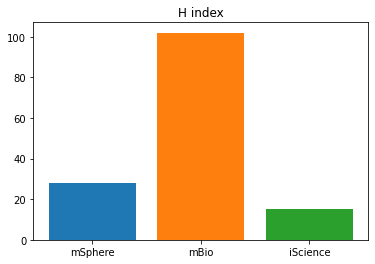

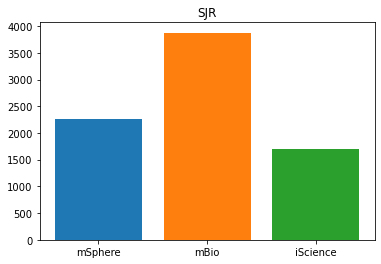

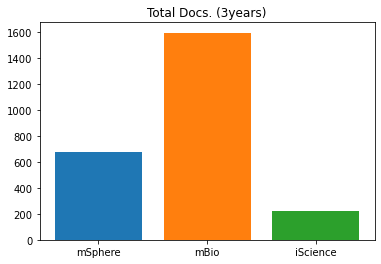

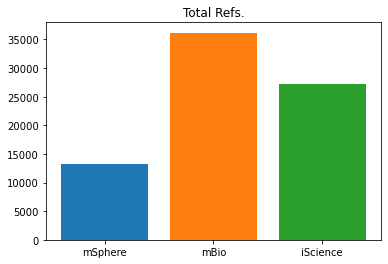

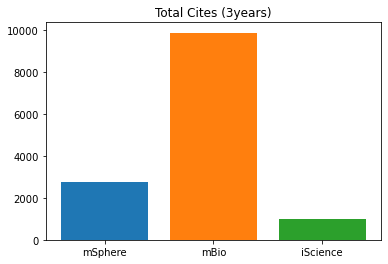

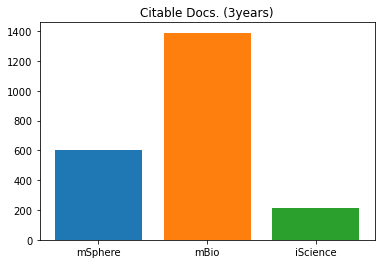

In [18]:
def compare():
    def clicked(arg):
        if choices.value=='Journals':
            compare_journal()
        else:
            compare_country()
    print('Select Journal or country to compare with it .....')
    choices = Dropdown(options=['Journals','Countries'], description='Choice')
    button = Button(description="Select")
    panel = HBox([choices, button])
    display(panel)
    button.on_click(clicked)#,remove=True)
compare()

Select Journal or country to compare with it .....


Select years .....


['2010']
['2010', '2011']
['2010', '2011', '2012']
['2010', '2011', '2012', '2013']
['2010', '2011', '2012', '2013', '2014']
['2010', '2011', '2012', '2013', '2014', '2015']
['2010', '2011', '2012', '2013', '2014', '2015', '2016']
['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']
Select countries..............


['Spain']
['Spain', 'Tunisia']
['Spain', 'Tunisia', 'United Kingdom']
['Spain', 'Tunisia', 'United Kingdom', 'United States']


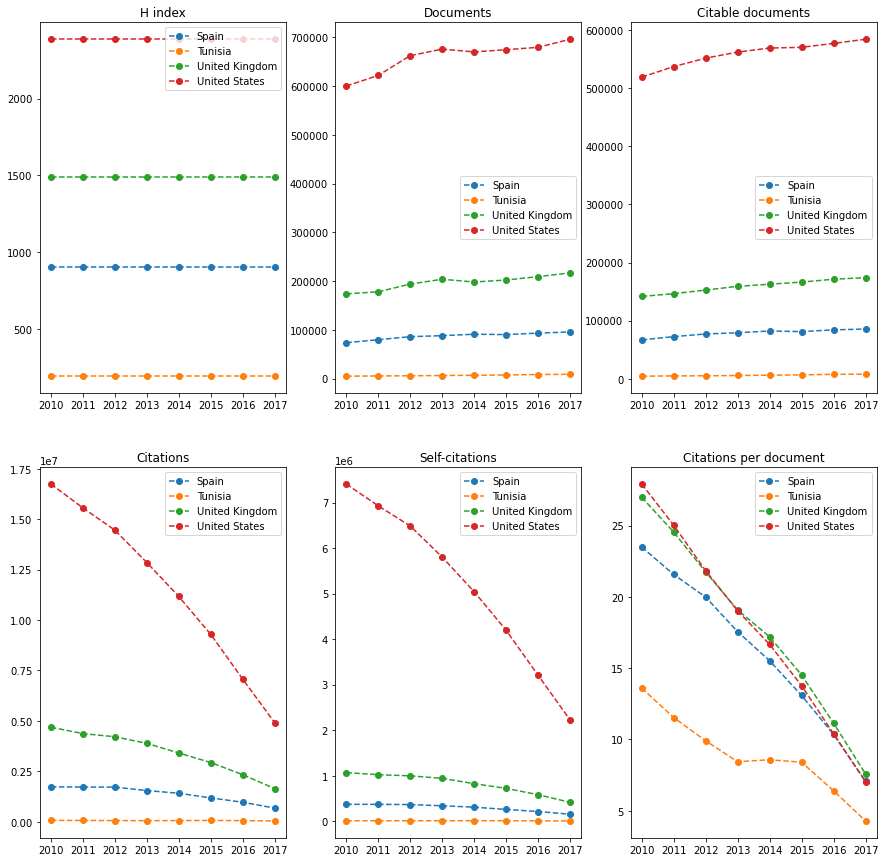

In [41]:
compare()

************this is for last Q***********To compare Region******************************

Select The years .....


Select The years .....


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

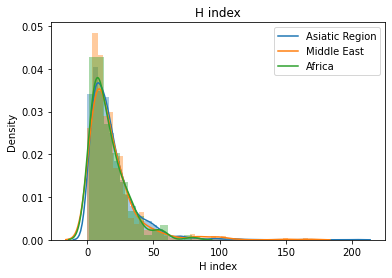

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

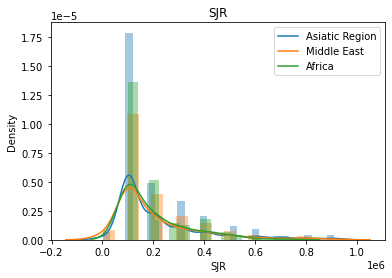

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

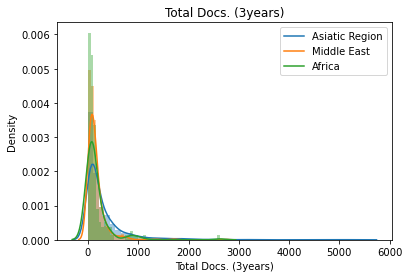

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

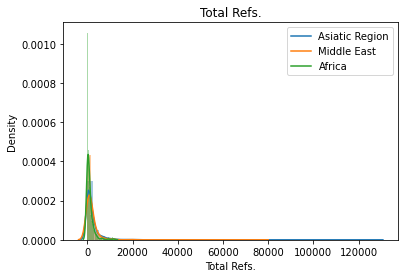

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

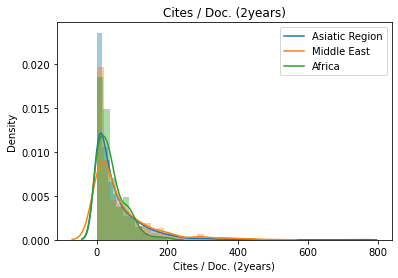

In [43]:
def compare_region():
    def clicked(arg):
        button.disabled=True
        regions=[]
        def clicked2(arg):
            regions.append(choices2.value)
        def clicked3(arg):
            button2.disabled=True
            button3.disabled=True
            idx=year_listJ.index(choices.value)
            df=all_data_journals[idx]
            #figure, axes = plt.subplots(nrows=2, ncols=3,figsize=(15,15))
            #axes[0,0].plot(years,y_list,'o--')
            plt.title('H index')
            for region in regions:
                #plt.title('CCCC')
                sns.distplot(df.loc[df['Region'] ==region]['H index'].dropna(), kde=True)
            plt.legend(labels=regions)
            plt.show()
            plt.title('SJR')
            for region in regions:
                
                sns.distplot(df.loc[df['Region'] ==region]['SJR'].dropna(), kde=True)
            plt.legend(labels=regions)
            plt.show()
            
            plt.title('Total Docs. (3years)')
            for region in regions:
                #plt.title('CCCC')
                sns.distplot(df.loc[df['Region'] ==region]['Total Docs. (3years)'].dropna(), kde=True)
            plt.legend(labels=regions)
            plt.show()
            
            plt.title('Total Refs.')
            for region in regions:
                #plt.title('CCCC')
                sns.distplot(df.loc[df['Region'] ==region]['Total Refs.'].dropna(), kde=True)
            plt.legend(labels=regions)
            plt.show()
            
            plt.title('Cites / Doc. (2years)')
            for region in regions:
                #plt.title('CCCC')
                sns.distplot(df.loc[df['Region'] ==region]['Cites / Doc. (2years)'].dropna(), kde=True)
            plt.legend(labels=regions)
            plt.show()
        print('Select The years .....')
        Options=all_data_journals[20]['Region'].unique()
        choices2 = Dropdown(options=Options, description='Choice')
        button2 = Button(description="Select")
        button3 = Button(description="Done")
        panel2 = HBox([choices2, button2,button3])
        display(panel2)
        button2.on_click(clicked2)#
        button3.on_click(clicked3)#
        
        
    print('Select The years .....')
    choices = Dropdown(options=year_listJ, description='Choice')
    button = Button(description="Select")
    panel = HBox([choices, button])
    display(panel)
    button.on_click(clicked)#,remove=True)
compare_region()

*************this part for box plot and  tallies, quartiles and quintiles,**************

Select The index .....


*********quantile*******************************************
          1999      2000      2001      2002      2003      2004      2005  \
0.10   2485.70   2441.40   2515.80   2521.70   2696.50   2686.00   2723.10   
0.50   3439.50   3401.50   3486.50   3547.00   3706.00   3757.00   3807.00   
0.75   5192.25   4679.25   4913.75   5047.25   5267.75   5533.75   5611.75   
1.00  50518.00  39676.00  39946.00  37525.00  37995.00  38189.00  37964.00   

         2006      2007      2008  ...      2010      2011      2012  \
0.10   2838.0   2986.30   3085.80  ...   3319.80   3479.50   3539.70   
0.50   3991.5   4304.50   4343.00  ...   4799.50   4946.50   5076.50   
0.75   6211.5   6325.25   6679.75  ...   7194.75   7294.25   7829.25   
1.00  40087.0  39266.00  39356.00  ...  46419.00  45218.00  49268.00   

          2013     2014     2015      2016      2017      2018      2019  
0.10   3686.90   3710.9   3659.5   3747.90   3774.00   3709.30   3677.40  
0.50   5406.50   5323.0   5368.0   53

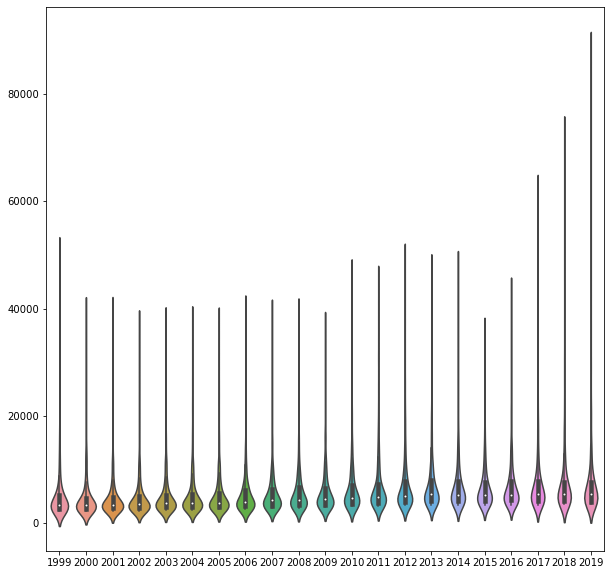

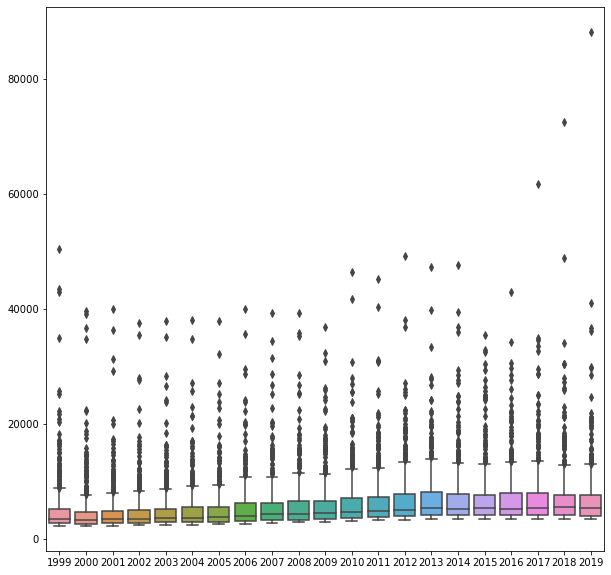

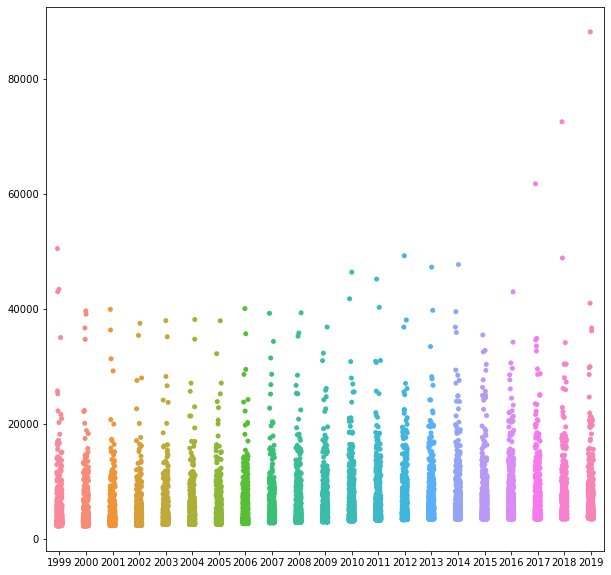

In [50]:
def all_Q_box_violin():
    def clicked(arg):
        button.disabled=True
        allD=[]
        col=choices.value
        for df in all_data_journals:
            allD.append(df[col].values[:500])
        datfr=pd.DataFrame(allD,index=year_listJ)
        datfr=datfr.transpose()
        print('*********quantile*******************************************')
        print(datfr.quantile([.1,.5,.75,1]))
        print('*********tallies*******************************************')
        print(datfr.describe())
        fig=plt.subplots(figsize=(10,10))
        sns.violinplot(data=datfr)
        fig=plt.subplots(figsize=(10,10))
        sns.boxplot(data=datfr)
        fig=plt.subplots(figsize=(10,10))
        sns.stripplot(data=datfr)
        
    print('Select The index .....')
    choices = Dropdown(options=['SJR','Total Refs.','H index'], description='Choice')
    button = Button(description="Select")
    panel = HBox([choices, button])
    display(panel)
    button.on_click(clicked)
all_Q_box_violin()
